In [1]:
import os
import cv2
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.metrics import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

## Stick Figure CNN Model 구현

# 이미지 데이터(특징값) 불러오는 함수 -> 전처리 동시에
def load_images(image_path):
    images = []
    for filename in os.listdir(image_path):
        img = cv2.imread(os.path.join(image_path,filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (32, 32)) # 이미지 크기 조정
            img = img.flatten() # 이미지 일차원 배열로 변환
            images.append(img)
    return np.array(images)


# CSV(목푯값) 불러오는 함수 -> 첫 번째 열(이미지 이름) 제외
def load_csv(csv_path):
    df = pd.read_csv(csv_path, header=None)
    joint = df.iloc[:, 1:].to_numpy()
    return joint

# Load image and target data
X_train = load_images("./image_train/")
y_train = load_csv("./joint_train.csv")

for i in range(len(y_train)):
    if y_train[i][6] > y_train[i][10]:
        for j in range(6,10):
            tmp = y_train[i][j]
            y_train[i][j] = y_train[i][j+4]
            y_train[i][j+4] = tmp

    if y_train[i][14] > y_train[i][18]:
        for j in range(14,18):
            tmp = y_train[i][j]
            y_train[i][j] = y_train[i][j+4]
            y_train[i][j+4] = tmp

        

X_validation = load_images("./image_validation/")
y_validation = load_csv("./joint_validation.csv")

for i in range(len(y_validation)):
    if y_validation[i][6] > y_validation[i][10]:
        for j in range(6,10):
            tmp = y_validation[i][j]
            y_validation[i][j] = y_validation[i][j+4]
            y_validation[i][j+4] = tmp

    if y_validation[i][14] > y_validation[i][18]:
        for j in range(14,18):
            tmp = y_validation[i][j]
            y_validation[i][j] = y_validation[i][j+4]
            y_validation[i][j+4] = tmp

X_test = load_images("./image_test/")
y_test = load_csv("./joint_test.csv")

for i in range(len(y_test)):
    if y_test[i][6] > y_test[i][10]:
        for j in range(6,10):
            tmp = y_test[i][j]
            y_test[i][j] = y_test[i][j+4]
            y_test[i][j+4] = tmp

    if y_test[i][14] > y_test[i][18]:
        for j in range(14,18):
            tmp = y_test[i][j]
            y_test[i][j] = y_test[i][j+4]
            y_test[i][j+4] = tmp

X_ex = load_images("./image_ex/")
y_ex = load_csv("./joint_ex.csv")

for i in range(len(y_ex)):
    if y_ex[i][6] > y_ex[i][10]:
        for j in range(6,10):
            tmp = y_ex[i][j]
            y_ex[i][j] = y_ex[i][j+4]
            y_ex[i][j+4] = tmp

    if y_ex[i][14] > y_ex[i][18]:
        for j in range(14,18):
            tmp = y_ex[i][j]
            y_ex[i][j] = y_ex[i][j+4]
            y_ex[i][j+4] = tmp




# 데이터 전처리 (입력 이미지와 목표값 간의 매핑 필요)
x_train_preprocessed = X_train.reshape(-1, 32, 32, 1).astype('float32') / 255.0
x_validation_preprocessed = X_validation.reshape(-1, 32, 32, 1).astype('float32') / 255.0
x_test_preprocessed = X_test.reshape(-1, 32, 32, 1).astype('float32') / 255.0
x_ex_preprocessed = X_ex.reshape(-1, 32, 32, 1).astype('float32') / 255.0

# 모델 구축
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(22))


# 모델 컴파일
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

# 모델 학습
history = model.fit(x_train_preprocessed, y_train, epochs=100, batch_size=32, validation_data=(x_validation_preprocessed, y_validation))


Epoch 1/100
125/125 [==============================] - 3s 17ms/step - loss: 6526.2031 - mae: 60.6194 - val_loss: 1947.3873 - val_mae: 36.7158
Epoch 2/100
125/125 [==============================] - 2s 17ms/step - loss: 2024.0697 - mae: 34.8358 - val_loss: 1874.8623 - val_mae: 35.9149
Epoch 3/100
125/125 [==============================] - 2s 16ms/step - loss: 1693.3643 - mae: 31.4813 - val_loss: 1966.6053 - val_mae: 37.1070
Epoch 4/100
125/125 [==============================] - 2s 16ms/step - loss: 1525.2488 - mae: 29.7865 - val_loss: 2323.6113 - val_mae: 41.3461
Epoch 5/100
125/125 [==============================] - 2s 17ms/step - loss: 1398.2589 - mae: 28.2416 - val_loss: 2025.5226 - val_mae: 37.9184
Epoch 6/100
125/125 [==============================] - 2s 17ms/step - loss: 1311.6857 - mae: 27.1861 - val_loss: 2596.8933 - val_mae: 44.2001
Epoch 7/100
125/125 [==============================] - 2s 18ms/step - loss: 1351.8658 - mae: 27.6922 - val_loss: 1914.0035 - val_mae: 36.5837
Epoch 

In [2]:

# 모델 평가
test_loss, test_mae = model.evaluate(x_test_preprocessed, y_test)
print('Test MAE:', test_mae)

# 모델 예측
y_pred = model.predict(x_test_preprocessed)

# R-Squared 계산
def r_squared(y_test, y_pred):
    # 실제값의 평균 계산
    mean_y_true = np.mean(y_test)

    # SSE (Sum of Squared Errors) 계산
    sse = np.sum((y_test - y_pred) ** 2)

    # SST (Sum of Squares Total) 계산
    sst = np.sum((y_test - mean_y_true) ** 2)

    # R-제곱 계산
    r_squared = 1 - (sse / sst)

    return r_squared

print('R-Squared:', r_squared(y_test, y_pred))

# 이미지 예측
predictions = model.predict(x_ex_preprocessed)

# 예측 결과 출력
#for i in range(len(predictions)):
#    print("Image", i+1, "Predicted Coordinates:", predictions[i])

print("x_ex 예측 좌표값:", predictions)  
print("실제 x_ex 좌표값:", y_ex)
print("오차:", predictions - y_ex)

# 오차 평균 구하기
average = np.mean(predictions - y_ex)
print("오차 평균의 절대값:", abs(average))

125/125 [==============================] - 1s 6ms/step - loss: 447.3457 - mae: 15.1555
Test MAE: 15.155481338500977
125/125 [==============================] - 1s 6ms/step
R-Squared: 0.8485695621330879
1/1 [==============================] - 0s 116ms/step
x_ex 예측 좌표값: [[150.9933   149.58368  151.3421    92.05062  152.50986   67.64683
  121.01113  120.588905 112.931175 138.49117  180.31639  119.709045
  187.74469  139.12967  136.7145   208.58055  127.70415  256.80865
  167.2278   207.23924  174.87245  256.41718 ]]
실제 x_ex 좌표값: [[155 133 154 102 161  73 158 112 163 122 191 106 229 110 123 202  91 271
  185 204 216 274]]
오차: [[ -4.00669861  16.5836792   -2.65789795  -9.94937897  -8.49014282
   -5.3531723  -36.98886871   8.58890533 -50.06882477  16.49116516
  -10.68360901  13.70904541 -41.25531006  29.12966919  13.7144928
    6.58055115  36.70414734 -14.19134521 -17.77220154   3.23924255
  -41.12754822 -17.58282471]]
오차 평균의 절대값: 5.2448602156205615


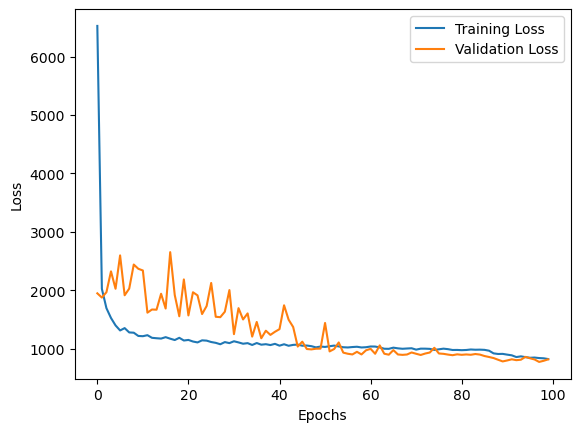

In [3]:
# 손실값 기록
loss = history.history['loss']
val_loss = history.history['val_loss']

# 지표 기록
mae = history.history['mae']
val_mae = history.history['val_mae']

# 시각화 

import matplotlib.pyplot as plt



# 손실값 그래프
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



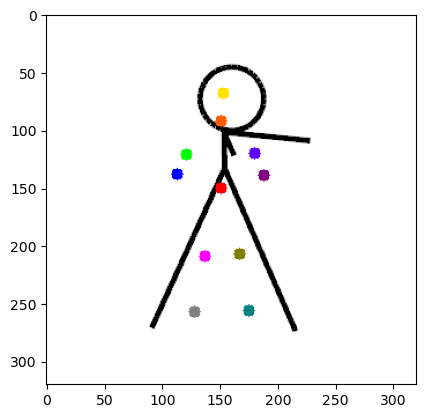

In [5]:
imageFile = './image_ex/sf012600.png'
X_ex_image = cv2.imread(imageFile)

#print(X_ex_image)
#이미지, 점 출력
#plt.imshow(X_ex_image)
#plt.show()

#predictions
#y_ex

# 각 관절 위치 값 저장
data=predictions[0]

c1_x = int(round(data[0]))           
c1_y = int(round(data[1]))            
c2_x = int(round(data[2]))             
c2_y = int(round(data[3]))             
c3_x = int(round(data[4]))             
c3_y = int(round(data[5]))             
le_x = int(round(data[6]))             
le_y = int(round(data[7]))            
lh_x = int(round(data[8]))             
lh_y = int(round(data[9]))             
re_x = int(round(data[10]))             
re_y = int(round(data[11]))             
rh_x = int(round(data[12]))             
rh_y = int(round(data[13]))             
lk_x = int(round(data[14]))             
lk_y = int(round(data[15]))              
lf_x = int(round(data[16]))             
lf_y = int(round(data[17]))             
rk_x = int(round(data[18]))             
rk_y = int(round(data[19]))             
rf_x = int(round(data[20]))             
rf_y = int(round(data[21]))  



cv2.circle(X_ex_image,(c1_x,c1_y), radius=5, color=(0,0,255), thickness=-1)  #빨
cv2.circle(X_ex_image,(c2_x,c2_y), radius=5, color=(0,94,255), thickness=-1)  #주
cv2.circle(X_ex_image,(c3_x,c3_y), radius=5, color=(0,228,255), thickness=-1) #노
cv2.circle(X_ex_image,(le_x,le_y), radius=5, color=(0,255,0), thickness=-1)  #초
cv2.circle(X_ex_image,(lh_x,lh_y), radius=5, color=(255,0,0), thickness=-1)  #파
cv2.circle(X_ex_image,(re_x,re_y), radius=5, color=(255,0,95), thickness=-1)
cv2.circle(X_ex_image,(rh_x,rh_y), radius=5, color=(128,0,128), thickness=-1)
cv2.circle(X_ex_image,(lk_x,lk_y), radius=5, color=(255,0,255), thickness=-1)
cv2.circle(X_ex_image,(lf_x,lf_y), radius=5, color=(128,128,128), thickness=-1)
cv2.circle(X_ex_image,(rk_x,rk_y), radius=5, color=(0,128,128), thickness=-1)
cv2.circle(X_ex_image,(rf_x,rf_y), radius=5, color=(128,128,0), thickness=-1)


img = cv2.cvtColor(X_ex_image, cv2.COLOR_BGR2RGB)

#이미지, 점 출력
plt.imshow(img)
plt.show()



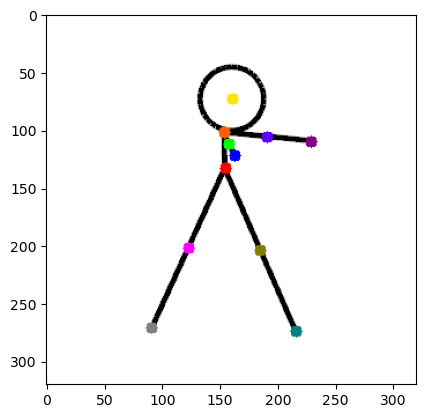

In [6]:
imageFile = './image_ex/sf012600.png'
X_ex_image = cv2.imread(imageFile)

# 각 관절 위치 값 저장
data=y_ex[0]

c1_x = int(round(data[0]))           
c1_y = int(round(data[1]))            
c2_x = int(round(data[2]))             
c2_y = int(round(data[3]))             
c3_x = int(round(data[4]))             
c3_y = int(round(data[5]))             
le_x = int(round(data[6]))             
le_y = int(round(data[7]))            
lh_x = int(round(data[8]))             
lh_y = int(round(data[9]))             
re_x = int(round(data[10]))             
re_y = int(round(data[11]))             
rh_x = int(round(data[12]))             
rh_y = int(round(data[13]))             
lk_x = int(round(data[14]))             
lk_y = int(round(data[15]))              
lf_x = int(round(data[16]))             
lf_y = int(round(data[17]))             
rk_x = int(round(data[18]))             
rk_y = int(round(data[19]))             
rf_x = int(round(data[20]))             
rf_y = int(round(data[21]))  



cv2.circle(X_ex_image,(c1_x,c1_y), radius=5, color=(0,0,255), thickness=-1)  #빨
cv2.circle(X_ex_image,(c2_x,c2_y), radius=5, color=(0,94,255), thickness=-1)  #주
cv2.circle(X_ex_image,(c3_x,c3_y), radius=5, color=(0,228,255), thickness=-1) #노
cv2.circle(X_ex_image,(le_x,le_y), radius=5, color=(0,255,0), thickness=-1)  #초
cv2.circle(X_ex_image,(lh_x,lh_y), radius=5, color=(255,0,0), thickness=-1)  #파
cv2.circle(X_ex_image,(re_x,re_y), radius=5, color=(255,0,95), thickness=-1)
cv2.circle(X_ex_image,(rh_x,rh_y), radius=5, color=(128,0,128), thickness=-1)
cv2.circle(X_ex_image,(lk_x,lk_y), radius=5, color=(255,0,255), thickness=-1)
cv2.circle(X_ex_image,(lf_x,lf_y), radius=5, color=(128,128,128), thickness=-1)
cv2.circle(X_ex_image,(rk_x,rk_y), radius=5, color=(0,128,128), thickness=-1)
cv2.circle(X_ex_image,(rf_x,rf_y), radius=5, color=(128,128,0), thickness=-1)


img = cv2.cvtColor(X_ex_image, cv2.COLOR_BGR2RGB)

#이미지, 점 출력
plt.imshow(img)
plt.show()

